![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/multi_lingual_text_classification/colab/Training/multi_lingual/binary_text_classification/NLU_multi_lingual_training_sentiment_classifier_demo_twitter.ipynb)

# Training a Sentiment Analysis Classifier with NLU 
## 2 Class Twitter  Sentiment Classifier  Training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)


*   List item
*   List item


You can achieve these results or even better on this dataset with training  data  : 

<br> 

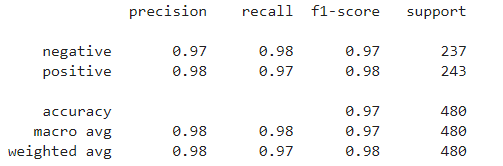

You can achieve these results or even better on this dataset with test  data  : 

<br> 

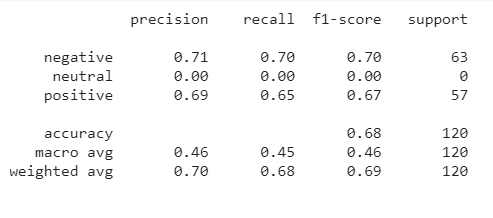

# 1. Install Java 8 and NLU

In [ ]:
import os
from sklearn.metrics import classification_report
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install  pyspark==2.4.7 
! pip install nlu > /dev/null    



import nlu

     |████████████████████████████████| 217.9MB 62kB/s 
     |████████████████████████████████| 204kB 18.8MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.7-py2.py3-none-any.whl size=218279465 sha256=7236adf9353cce5912057eb957aa7a21314e0f9753237475e8fd609b90e438e8
  Stored in directory: /root/.cache/pip/wheels/34/1f/2e/1e7460f80acf26b08dbb8c53d7ff9e07146f2a68dd5c732be5
Successfully built pyspark


# 2. Download twitter Sentiment dataset 
https://www.kaggle.com/cosmos98/twitter-and-reddit-sentimental-analysis-dataset
#Context

This is was a Dataset Created as a part of the university Project On Sentimental Analysis On Multi-Source Social Media Platforms using PySpark.

In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/twitter_data_multi_lang.csv


--2021-02-25 17:42:56--  http://ckl-it.de/wp-content/uploads/2021/02/twitter_data_multi_lang.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125908 (123K) [text/csv]
Saving to: ‘twitter_data_multi_lang.csv’

twitter_data_multi_ 100%[===================>] 122.96K   232KB/s    in 0.5s    

2021-02-25 17:42:57 (232 KB/s) - ‘twitter_data_multi_lang.csv’ saved [125908/125908]



In [ ]:
import pandas as pd
train_path = '/content/twitter_data_multi_lang.csv'

train_df = pd.read_csv(train_path)
train_df.test_sentences = train_df.test_sentences.astype(str)
# the text data to use for classification should be in a column named 'text'
# the label column must have name 'y' name be of type str
train_df= train_df[["text","y"]]
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
101,more than million additional farmers will get ...,positive
440,bjp struggles find candidates west bengal graf...,negative
28,know going into dirty details nehru family its...,negative
317,apke yar modi message our people celebrate pak...,positive
477,why cant write one single tweet without blamin...,negative
...,...,...
330,governor kalyan singh aligarh 23rd march all a...,positive
142,after going thru all the comedy speeches shri ...,positive
38,tag this fast growing youtuber cared abt this ...,negative
205,not huge resulting bloodshed there will protes...,negative


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
trainable_pipe = nlu.load('xx.embed_sentence.labse train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['sentiment_dl'].setMaxEpochs(60)  
trainable_pipe['sentiment_dl'].setLr(0.005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

labse download started this may take some time.
Approximate size to download 1.7 GB
[OK!]
              precision    recall  f1-score   support

    negative       0.97      0.98      0.97       237
    positive       0.98      0.97      0.98       243

    accuracy                           0.97       480
   macro avg       0.98      0.98      0.97       480
weighted avg       0.98      0.97      0.98       480



,text,sentiment,xx_embed_sentence_labse_embeddings,sentiment_confidence,y,document
origin_index,,,,,,
101,more than million additional farmers will get ...,positive,"[0.007220160216093063, 0.02621868997812271, 0....",0.999999,positive,more than million additional farmers will get ...
440,bjp struggles find candidates west bengal graf...,negative,"[-0.0011240983149036765, 0.01309733372181654, ...",0.997356,negative,bjp struggles find candidates west bengal graf...
28,know going into dirty details nehru family its...,negative,"[-0.0208485908806324, 0.02829776145517826, 0.0...",0.999963,negative,know going into dirty details nehru family its...
317,apke yar modi message our people celebrate pak...,positive,"[-0.0184789951890707, 0.011275646276772022, -0...",1.000000,positive,apke yar modi message our people celebrate pak...
477,why cant write one single tweet without blamin...,negative,"[-0.005628153216093779, 0.017803337424993515, ...",0.999919,negative,why cant write one single tweet without blamin...
...,...,...,...,...,...,...
330,governor kalyan singh aligarh 23rd march all a...,positive,"[0.006282471120357513, -0.027118012309074402, ...",1.000000,positive,governor kalyan singh aligarh 23rd march all a...
142,after going thru all the comedy speeches shri ...,positive,"[-0.051873888820409775, 0.007939846254885197, ...",0.999910,positive,after going thru all the comedy speeches shri ...
38,tag this fast growing youtuber cared abt this ...,negative,"[0.01988791488111019, -0.011552331037819386, 0...",0.999895,negative,tag this fast growing youtuber cared abt this ...


# 3.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

              precision    recall  f1-score   support

    negative       0.71      0.70      0.70        63
     neutral       0.00      0.00      0.00         0
    positive       0.69      0.65      0.67        57

    accuracy                           0.68       120
   macro avg       0.46      0.45      0.46       120
weighted avg       0.70      0.68      0.69       120



# 4. Test Model  on 20 languages!

In [ ]:
train_df = pd.read_csv("/content/twitter_data_multi_lang.csv")
preds = fitted_pipe.predict(train_df[["test_sentences","y"]].iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

              precision    recall  f1-score   support

    negative       0.91      0.80      0.85        49
     neutral       0.00      0.00      0.00         0
    positive       0.85      0.92      0.89        51

    accuracy                           0.86       100
   macro avg       0.59      0.57      0.58       100
weighted avg       0.88      0.86      0.87       100



,text,sentiment,xx_embed_sentence_labse_embeddings,sentiment_confidence,y,document
origin_index,,,,,,
0,how narendra modi has almost killed the indian...,negative,"[-0.055935658514499664, 0.05042083561420441, -...",0.999031,negative,how narendra modi has almost killed the indian...
1,تعتقد أنه كان مودي وراء هذا الحادث,negative,"[0.00735881645232439, -0.0520767942070961, 0.0...",0.950884,negative,تعتقد أنه كان مودي وراء هذا الحادث
2,カマル・ハサーンがチョウキダール・モディを連れて行くカマル・ハサーン・モディの金持ちが貧しい...,negative,"[-0.012155445292592049, -0.020653903484344482,...",0.999994,negative,カマル・ハサーンがチョウキダール・モディを連れて行くカマル・ハサーン・モディの金持ちが貧しい...
3,"связанное имя с фамилией, а не bcz религия, св...",negative,"[-0.006620911415666342, 0.025743944570422173, ...",0.999951,negative,"связанное имя с фамилией, а не bcz религия, св..."
4,"kdokoli lepší než modi, když nehruji vypršela,...",positive,"[-0.04917776957154274, 0.01752305217087269, -0...",1.000000,positive,"kdokoli lepší než modi, když nehruji vypršela,..."
...,...,...,...,...,...,...
95,lol qui va épouser son hippopotame tous les ho...,positive,"[-0.010019153356552124, -0.03171534836292267, ...",0.999032,positive,lol qui va épouser son hippopotame tous les ho...
96,拉贾斯坦邦州长卡莉安·辛格·阿里加3月23日全都是bjp工人，希望bjp胜利，希望莫迪再次成...,positive,"[0.009000579826533794, -0.021888382732868195, ...",0.999999,positive,拉贾斯坦邦州长卡莉安·辛格·阿里加3月23日全都是bjp工人，希望bjp胜利，希望莫迪再次成...
97,మోడీ భక్తులు రాహుల్ గురించి అబద్ధాలు చెబుతున్న...,positive,"[-0.05518202483654022, -0.004170998930931091, ...",0.891503,positive,మోడీ భక్తులు రాహుల్ గురించి అబద్ధాలు చెబుతున్న...


# The Model understands Englsih
![en](https://www.worldometers.info/img/flags/small/tn_nz-flag.gif)

In [ ]:
fitted_pipe.predict("Congress's new policies made many people sad ")


,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[0.004380677826702595, -0.002109142020344734, ...",0.993856,negative,Congress's new policies made many people sad


In [ ]:
fitted_pipe.predict("Congress's new policies made many people happy ")


,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[0.02597951516509056, -0.007445341441780329, -...",0.999998,positive,Congress's new policies made many people happy


# The Model understands German
![de](https://www.worldometers.info/img/flags/small/tn_gm-flag.gif)

In [ ]:
# German for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("Die neue Politik des Kongresses machte viele Menschen arm, traurig und depressiv ")


,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[-0.02746930904686451, 0.015148884616792202, -...",0.994498,negative,Die neue Politik des Kongresses machte viele M...


In [ ]:
# German for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("Die neue Politik des Kongresses machte viele Menschen glücklich ")


,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[0.008141150698065758, -0.009829352609813213, ...",0.999969,positive,Die neue Politik des Kongresses machte viele M...


# The Model understands Chinese
![zh](https://www.worldometers.info/img/flags/small/tn_ch-flag.gif)

In [ ]:
# Chinese for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("国会的新政策使许多人感到高兴 ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[0.009464382193982601, -0.012016323395073414, ...",0.999999,positive,国会的新政策使许多人感到高兴


In [ ]:
# Chinese for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("国会的新政策使许多人变得贫穷，悲伤和沮丧 ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[-0.05506608635187149, -0.0026403777301311493,...",0.999973,negative,国会的新政策使许多人变得贫穷，悲伤和沮丧


# Model understands Afrikaans

![af](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)



In [ ]:
#  Afrikaans for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("Die Kongres se nuwe beleid het baie mense arm, hartseer en depressief gemaak ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[-0.023684455081820488, 0.0034083002246916294,...",0.991269,negative,"Die Kongres se nuwe beleid het baie mense arm,..."


In [ ]:
#  Afrikaans for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("Die Kongres se nuwe beleid het baie mense gelukkig gemaak ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[0.005836580414324999, -0.029826413840055466, ...",0.999999,positive,Die Kongres se nuwe beleid het baie mense gelu...


# The model understands Japanese
![ja](https://www.worldometers.info/img/flags/small/tn_ja-flag.gif)


In [ ]:
# Japanese for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("議会の新しい政策は多くの人々を貧しく、悲しくそして落ち込んだものにしました ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[-0.04006955772638321, 0.0033476173412054777, ...",0.999940,negative,議会の新しい政策は多くの人々を貧しく、悲しくそして落ち込んだものにしました


In [ ]:

		
# Japanese for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("議会の新しい政策は多くの人々を幸せにしました ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[-0.017957257106900215, -0.015919474884867668,...",0.999990,positive,議会の新しい政策は多くの人々を幸せにしました


# The  Model understands Turkish
![tr](https://www.worldometers.info/img/flags/small/tn_tu-flag.gif)

In [ ]:
#  Turkish for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("Kongrenin yeni politikaları birçok insanı fakir, hüzünlü ve depresif hale getirdi ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[-0.02755211666226387, 0.012688509188592434, -...",0.999879,negative,Kongrenin yeni politikaları birçok insanı faki...


In [ ]:
#  Turkish for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("Kongrenin yeni politikaları birçok insanı mutlu etti ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[0.01936783455312252, -0.00632244348526001, -0...",0.999999,positive,Kongrenin yeni politikaları birçok insanı mutl...


#  The Model understands Hebrew
![he](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
# Hebrew for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("המדיניות החדשה של הקונגרס גרמה לאנשים רבים להיות עניים, עצובים ומדוכאים ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[-0.03273191303014755, -0.016592293977737427, ...",0.999585,negative,המדיניות החדשה של הקונגרס גרמה לאנשים רבים להי...


In [ ]:
# Hebrew for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("המדיניות החדשה של הקונגרס שימחה אנשים רבים ")
		

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[0.0014839960495010018, -0.01997889205813408, ...",0.999985,positive,המדיניות החדשה של הקונגרס שימחה אנשים רבים


# The Model understands Telugu
![te](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# Telugu for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("కాంగ్రెస్ కొత్త విధానాలు చాలా మందిని పేదలుగా, విచారంగా, నిరాశకు గురి చేశాయి ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[-0.029074613004922867, -0.022254789248108864,...",0.999552,negative,"కాంగ్రెస్ కొత్త విధానాలు చాలా మందిని పేదలుగా, ..."


In [ ]:
# Telugu for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("కాంగ్రెస్ కొత్త విధానాలు చాలా మందికి సంతోషాన్నిచ్చాయి ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[0.0038313723634928465, -0.0348954014480114, -...",1.000000,positive,కాంగ్రెస్ కొత్త విధానాలు చాలా మందికి సంతోషాన్న...


# Model understands Russian
![ru](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)


In [ ]:
#  Russian for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("Новая политика Конгресса сделала многих людей бедными, грустными и подавленными ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[-0.029941828921437263, 0.016272377222776413, ...",0.999666,negative,Новая политика Конгресса сделала многих людей ...


In [ ]:

		
#  Russian for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("Новая политика Конгресса порадовала многих людей ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[-0.002074663760140538, 0.014204155653715134, ...",0.999997,positive,Новая политика Конгресса порадовала многих людей


# Model understands Urdu
![ur](https://www.worldometers.info/img/flags/small/tn_pk-flag.gif)

In [ ]:

		
# Urdu for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("کانگریس کی نئی پالیسیوں نے بہت سارے لوگوں کو غریب ، افسردہ اور افسردہ کردیا ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[-0.03277842700481415, -0.019150162115693092, ...",0.999972,negative,کانگریس کی نئی پالیسیوں نے بہت سارے لوگوں کو غ...


In [ ]:
# Urdu for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("کانگریس کی نئی پالیسیوں نے بہت سارے لوگوں کو خوش کیا ")
		

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[0.0033543522004038095, -0.03387867286801338, ...",0.994481,positive,کانگریس کی نئی پالیسیوں نے بہت سارے لوگوں کو خ...


# Model understands Hindi
![hi](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# hindi for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("कांग्रेस की नई नीतियों ने कई लोगों को गरीब, दुखी और उदास बना दिया ")
		

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[-0.030935170128941536, -0.011918678879737854,...",0.999578,negative,"कांग्रेस की नई नीतियों ने कई लोगों को गरीब, दु..."


In [ ]:
# hindi for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("कांग्रेस की नई नीतियों ने कई लोगों को खुश किया ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[0.005392682272940874, -0.024082256481051445, ...",0.999996,positive,कांग्रेस की नई नीतियों ने कई लोगों को खुश किया


# The model understands Tartar
![tt](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)

In [ ]:
# Tartar for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("Конгрессның яңа политикасы күп кешеләрне ярлы, моңсу һәм депрессиягә китерде ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[-0.003766064764931798, -0.0006652609445154667...",0.982602,negative,"Конгрессның яңа политикасы күп кешеләрне ярлы,..."


In [ ]:

		
# Tartar for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("Конгрессның яңа политикасы күпләрне сөендерде ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[0.00829650741070509, -0.007502756081521511, -...",0.999998,positive,Конгрессның яңа политикасы күпләрне сөендерде


# The Model understands French
![fr](https://www.worldometers.info/img/flags/small/tn_fr-flag.gif)

In [ ]:
		
# French for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("Les nouvelles politiques du Congrès ont rendu de nombreuses personnes pauvres, tristes et déprimées ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[-0.017834072932600975, 0.011118757538497448, ...",0.999893,negative,Les nouvelles politiques du Congrès ont rendu ...


In [ ]:
# French for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("Les nouvelles politiques du Congrès ont rendu de nombreuses personnes heureuses ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[0.01951567642390728, -0.010051790624856949, -...",1.000000,positive,Les nouvelles politiques du Congrès ont rendu ...


# The Model understands Thai
![th](https://www.worldometers.info/img/flags/small/tn_th-flag.gif)

In [ ]:
		
# Thai for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("นโยบายใหม่ของสภาคองเกรสทำให้หลายคนยากจนเศร้าและหดหู่ ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[3.636999394984741e-07, -0.0028806282207369804...",0.983253,negative,นโยบายใหม่ของสภาคองเกรสทำให้หลายคนยากจนเศร้าแล...


In [ ]:
# Thai for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("นโยบายใหม่ของสภาคองเกรสทำให้หลายคนพอใจ ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[0.012098119594156742, 0.006513879634439945, -...",1.000000,positive,นโยบายใหม่ของสภาคองเกรสทำให้หลายคนพอใจ


# The Model understands Khmer
![km](https://www.worldometers.info/img/flags/small/tn_cb-flag.gif)

In [ ]:
# Khmer for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("គោលនយោបាយថ្មីរបស់សភាបានធ្វើឱ្យប្រជាជនជាច្រើនក្រីក្រក្រៀមក្រំនិងធ្លាក់ទឹកចិត្ត ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[-0.04521242156624794, 0.010355296544730663, -...",0.999896,negative,គោលនយោបាយថ្មីរបស់សភាបានធ្វើឱ្យប្រជាជនជាច្រើនក្...


In [ ]:
# Khmer for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("គោលនយោបាយថ្មីរបស់សភាបានធ្វើឱ្យមនុស្សជាច្រើនសប្បាយរីករាយ ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[-0.025576740503311157, -0.020313693210482597,...",0.999995,positive,គោលនយោបាយថ្មីរបស់សភាបានធ្វើឱ្យមនុស្សជាច្រើនសប្...


# The Model understands Yiddish
![yi](https://www.worldometers.info/img/flags/small/tn_pl-flag.gif)

In [ ]:
		
# Yiddish for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("קאָנגרעס ס נייַ פּאַלאַסיז געמאכט פילע מענטשן נעבעך, טרויעריק און דערשלאָגן ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[-0.007056358736008406, -0.0033369245938956738...",0.940492,negative,קאָנגרעס ס נייַ פּאַלאַסיז געמאכט פילע מענטשן ...


In [ ]:
# Yiddish for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("קאָנגרעס ס נייַ פּאַלאַסיז געמאכט פילע מענטשן צופרידן ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[0.002619842765852809, -0.018449867144227028, ...",0.999999,positive,קאָנגרעס ס נייַ פּאַלאַסיז געמאכט פילע מענטשן ...


# The Model understands Kygrgyz
![ky](https://www.worldometers.info/img/flags/small/tn_kg-flag.gif)

In [ ]:
# Kygrgyz for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("Конгресстин жаңы саясаты көптөгөн адамдарды жакыр, кайгыга чөгүп, көңүл чөгөттү ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[-0.0002845969283953309, -0.002948887180536985...",0.999439,negative,Конгресстин жаңы саясаты көптөгөн адамдарды жа...


In [ ]:
# Kygrgyz for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("Конгресстин жаңы саясаты көпчүлүктү кубандырды ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[0.01854480803012848, -0.0032602460123598576, ...",1.000000,positive,Конгресстин жаңы саясаты көпчүлүктү кубандырды


# The Model understands Tamil
![ta](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)

In [ ]:
# Tamil for: 'Congress's newest polices made many people poor, sad and depressed '
fitted_pipe.predict("காங்கிரசின் புதிய கொள்கைகள் பலரை ஏழைகளாகவும், சோகமாகவும், மனச்சோர்வடையச் செய்தன ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[-0.0065728831104934216, -0.000398304604459553...",0.999544,negative,"காங்கிரசின் புதிய கொள்கைகள் பலரை ஏழைகளாகவும், ..."


In [ ]:
# Tamil for: 'Congress's newest polices made many people happy '
fitted_pipe.predict("காங்கிரசின் புதிய கொள்கைகள் பலரை மகிழ்ச்சியடையச் செய்தன ")

,xx_embed_sentence_labse_embeddings,sentiment_confidence,sentiment,document
origin_index,,,,
0,"[0.01883488893508911, -0.01959705352783203, -0...",1.000000,positive,காங்கிரசின் புதிய கொள்கைகள் பலரை மகிழ்ச்சியடைய...


# 5. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 6. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
hdd_pipe = nlu.load(path=stored_model_path)
preds = hdd_pipe.predict('I am extremly depressed and down cause of school and just feel like ending my life...')
preds

,xx_embed_sentence_labse_embeddings,document,sentiment,sentiment_confidence
origin_index,,,,
0,"[-0.02176278457045555, -0.04837987199425697, -...",I am extremly depressed and down cause of scho...,negative,0.999979


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')        | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['regex_tokenizer'] has settable params:
pipe['regex_tokenizer'].setCaseSensitiveExceptions(True)   | Info: Whether to care for case sensitiveness in exceptions | Currently set to : True
pipe['regex_tokenizer'].setTargetPattern('\S+')            | Info: pattern to grab from text as token candidates. Defaults \S+ | Currently set to : \S+
pipe['regex_tokenizer'].setMaxLength(99999)                | Info: Set the maximum allowed length for each token | Currently set to : 99999
pipe['regex_tokenizer'].setMinLength(0)                    | Info: Set the minimum allowed length for each token | Currently set to : 0
>>> pipe['sentence_detector'] 